# Assignment 2: Inverse kinematics of our leg

Use this noteboook to document interacting with the robot class. The primary goal for this assignment is a video recording and plot rendering of your robot leg commanded to move along an *interesting* path (see the bat sign I chose in the readme page). 

__Deliverables__
1. Your leg.py file in the robot python module we are creating. The template provided has blank functions which need to be completed.
2. Two videos, a video of your robot tracing out your commanded trajectory (uploaded to youtube), and a gif of robot commanded trajectory (like on the readme page).
3. This notebook which you will use to send the move commands for the trajectory.


Team #:

Names:

# Getting started

In [1]:
# Import the robot class we are developing
import robot

In [2]:
# Make a new leg variable which is a robot.Leg class
leg = robot.Leg()

In [3]:
leg.get_joint_pos()

print('joint0: %f \t joint1: %f' % (leg.joint_0_pos, leg.joint_1_pos))

joint0: 2.000000 	 joint1: 1.400000


# Your code below!

In [4]:
leg.compute_internal_angles(3.1415926/2,3.1415926/2)

(1.84938598131823, 1.29220657653493)

In [5]:
leg.inverse_kinematics(2,8)

12.3373071877955
11.0356883512169
10.6083189664611
10.0969674365803
9.59918612029242
9.12340887974466
8.67066492391302
8.24042170398107
7.83173080457658
7.44354377964717
7.07481483097586
6.72453632582277
6.39175035753283
6.07555112774655
5.77508372932272
5.48954157954314
5.21816344557830
4.96023045934791
4.71506328258017
4.11419908200019
3.90909476020424
3.71429191645144
3.52925932740756
3.35349540767171
3.18652617443605
3.02790342316596
2.87720307893392
2.73402369621575
2.59798508589384
2.46872705258806
2.34590822870945
2.22920499411441
2.11831047214532
2.01293359432833
1.91279822716946
1.81764235542292
1.72721731695840
1.64128708496785
1.55962759375893
1.48202610480419
1.40828061007027
1.33819926995333
1.27159988340577
1.20830938806277
1.14816338837261
1.09100570990519
1.03668797816469
0.985069220366284
0.936015488756746
0.889399504166278
0.845100318575965
0.803002995573060
0.762998307645698
0.724982449341596
0.688856765381405
0.654527492878047
0.621905516869379
0.590906138422729
0.5

(5.74784274570453, 2.86808015696629)

In [6]:
import pandas as pd

df = pd.read_csv('heart.csv')
xx, yy = df['xx'], df['yy']
tt = len(xx)

In [4]:
tt=5
xx=[0,0.1,0.5,0.8,1]
yy=[18,18.5,19,19.5,20]

In [7]:
(sim_theta0, sim_theta1, sim_alpha0, sim_alpha1) = leg.move_trajectory(tt, xx, yy)

5.20496908164429
11.8445805186257
11.2576130595845
10.6993535021201
10.1682080257592
9.66277240720799
9.18178843352024
8.72410902699135
8.28867078353818
7.87447331572386
7.48056463986132
7.10603156663971
6.74999392097246
6.41160146505162
6.09003256904490
5.78449389297457
5.49422055738599
5.21847646103641
4.95655454189004
4.70777687534324
4.47149456796934
4.24708744443623
4.03396354707624
3.83155847783416
3.63933461536966
3.45678023899033
3.28340858784851
3.11875687970836
2.96238530932256
2.81387604245831
2.67283221807185
2.53887696811527
2.41165246196145
2.29081898040704
2.17605402260063
2.06705144797781
1.96352065430767
1.86518579221148
1.77178501595758
1.68306976992752
1.59880410985593
1.51876405774370
1.44273698921028
1.37052105197061
1.30192461408075
1.23676574058499
1.17487169720786
1.11607847976015
1.06023036796538
1.00717950245726
0.956785483748329
0.908914992021244
0.863441426647758
0.820244564393121
0.779210235316216
0.740230015426859
0.703200935210965
0.668025203181953
0.6346

In [8]:
import matplotlib.pyplot as plt
from sympy import sin, cos
import numpy as np

def sim_draw_leg(l0, l1, l2, theta1, theta2, alpha1, alpha2, ax=False):
    """
    This function takes in the four angles of the leg and draws
    the configuration
    """

    link1, link2, width = l1, l2, l0
    cor_range = l1 + l2
    
    if ax == False:
        ax = plt.gca()
        ax.cla()

    ax.plot(-width / 2, 0, 'ok')
    ax.plot(width / 2, 0, 'ok')

    ax.plot([-width / 2, 0], [0, 0], 'k')
    ax.plot([width / 2, 0], [0, 0], 'k')

    ax.plot(-width / 2 + np.array([0, link1 * cos(theta1)]), [0, link1 * sin(theta1)], 'k')
    ax.plot(width / 2 + np.array([0, link1 * cos(theta2)]), [0, link1 * sin(theta2)], 'k')

    ax.plot(-width / 2 + link1 * cos(theta1) + np.array([0, link2 * cos(alpha1)]), \
            link1 * sin(theta1) + np.array([0, link2 * sin(alpha1)]), 'k');
    ax.plot(width / 2 + link1 * cos(theta2) + np.array([0, link2 * cos(alpha2)]), \
            np.array(link1 * sin(theta2) + np.array([0, link2 * sin(alpha2)])), 'k');
            
    curr_x = float(width / 2 + link1 * cos(theta2) + link2 * cos(alpha2))
    curr_y = float(np.array(link1 * sin(theta2) + link2 * sin(alpha2)))

    ax.plot(curr_x, curr_y, 'ro');

    ax.axis([-cor_range, cor_range, -l1, cor_range])
    ax.invert_yaxis()



In [12]:
# Draw the legs and trajectory
%matplotlib qt5

for i in range(tt):
    sim_draw_leg(7.7, 7, 14, sim_theta1[i], sim_theta0[i], sim_alpha1[i], sim_alpha0[i])
    plt.plot(xx[0:i+1], yy[0:i+1])
    plt.pause(.3)
    

#Trajectory gif
![simulation of Trajectory gif](heart.gif)

In [6]:
# Verify legs are at home position (pi/2, pi/2)
(x,y) = leg.get_joint_pos()
print(float(x))
print(float(y))

-0.7921216880763815
0.0005892868090180414


In [7]:
# thetas acquired from the simulation
import numpy as np

thetas = np.loadtxt('thetas')

theta0 = thetas[0]
theta1 = thetas[1]

# set home position
leg.set_home()


In [23]:
#trace out trajectory on the actual arm
import time
for i in range(len(theta0)):
    leg.set_joint_pos(theta0[i], theta1[i])
    time.sleep(.4)

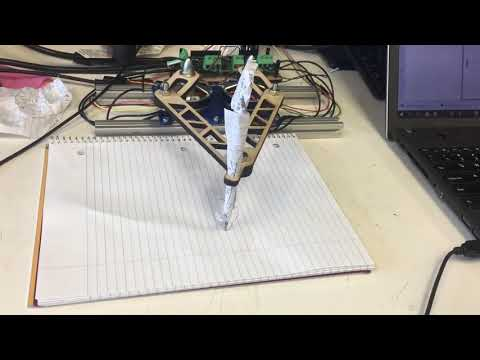

In [1]:
# YouTube Videos
from IPython.lib.display import YouTubeVideo

YouTubeVideo('01Rj47eNMu0')